In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define custom dataset directory path
# dataset_dir = '/path/to/custom_dataset'
dataset_dir = 'C:/Users/Sachin/OneDrive/Desktop/delete/custom_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
annotation_dir = os.path.join(dataset_dir, 'annotations') # Path to the directory containing annotations

# Define hyperparameters
batch_size = 32
image_size = (224, 224)
num_epochs = 20
num_classes=2

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(
    input_shape=image_size + (3,),
    include_top=False,
    weights='imagenet'
)

# Add custom top layers for object detection
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create custom model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Save the trained model
model.save('object_detection_model.h5')


Found 103 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Epoch 1/20
3/3 [==============================] - 17s 4s/step - loss: 3.6260 - accuracy: 0.4930 - val_loss: 0.7925 - val_accuracy: 0.6406
Epoch 2/20
3/3 [==============================] - 9s 3s/step - loss: 0.4675 - accuracy: 0.8169 - val_loss: 0.8515 - val_accuracy: 0.4375
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 0.3018 - accuracy: 0.8732 - val_loss: 1.0246 - val_accuracy: 0.6719
Epoch 4/20
3/3 [==============================] - 8s 3s/step - loss: 0.1528 - accuracy: 0.9296 - val_loss: 1.1667 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 8s 4s/step - loss: 0.0856 - accuracy: 0.9718 - val_loss: 1.4949 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 11s 4s/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 1.7893 - val_accuracy: 0.6406
Epoch 7/20
3/3 [==============================] - 8s 3s/step - loss: 0.0182 - accuracy: 1.0000 

In [38]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the trained model
# Load the trained model
model = torch.load('model_alex.pt', map_location=torch.device('cpu'))

# Load and preprocess the image
image_path = 'pattern09 (19).tif'  # Replace with the path to your image
image = Image.open(image_path)
# Apply any necessary image transformations
# For example, if the model expects input images of size 224x224 and normalized with mean=[0.485, 0.456, 0.406]
# and std=[0.229, 0.224, 0.225], you can use the following code:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)

# Perform inference on the image
# If the model expects batch input, you can use unsqueeze() to add a batch dimension
# For example, if the model expects a batch of images of size (batch_size, channels, height, width)
# you can use the following code:
image = image.unsqueeze(0)  # Add batch dimension
# Move the image to CPU
device = torch.device('cpu')
image = image.to(device)
# Forward pass to get predictions
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    output = model(image)
    # Perform any necessary post-processing on the output, such as softmax for probability scores
    # and argmax to get the predicted class
    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

# Convert predicted class tensor to Python int
predicted_class = predicted_class.item()

# Load class labels, e.g., from a text file or a list
class_labels = ['class1', 'class2', 'class3','class1', 'class2', 'class3','class1', 'class2', 'class3'] 

# Display the predicted class label and probability
print(f'Predicted class: {class_labels[predicted_class]}')
print(f'Probability: {probabilities[0, predicted_class].item():.4f}')

# Convert the image tensor back to a PIL image object
image = transforms.functional.to_pil_image(image.squeeze(0).cpu())

# Display the original image
image.show()


Predicted class: class3
Probability: 1.0000


In [17]:
import torch
import torchvision.transforms as transforms
from PIL import Image


In [18]:
# Load the trained model
model = torch.load('model_alex.pt')


C:\Users\Sachin\anaconda3\lib\site-packages\torch\serialization.py:868: SourceChangeWarning: source code of class 'torchvision.models.alexnet.AlexNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\Sachin\anaconda3\lib\site-packages\torch\serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\Sachin\anaconda3\lib\site-packages\torch\serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source 

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
# Load and preprocess the image
image_path = '24.tif'  # Replace with the path to your image
image = Image.open(image_path)
# Apply any necessary image transformations
# For example, if the model expects input images of size 224x224 and normalized with mean=[0.485, 0.456, 0.406]
# and std=[0.229, 0.224, 0.225], you can use the following code:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)


In [ ]:
# Perform inference on the image
# If the model expects batch input, you can use unsqueeze() to add a batch dimension
# For example, if the model expects a batch of images of size (batch_size, channels, height, width)
# you can use the following code:
image = image.unsqueeze(0)  # Add batch dimension
# Move the image to the same device (e.g., CPU or GPU) as the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
image = image.to(device)
# Forward pass to get predictions
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    output = model(image)
    # Perform any necessary post-processing on the output, such as softmax for probability scores
    # and argmax to get the predicted class
    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)


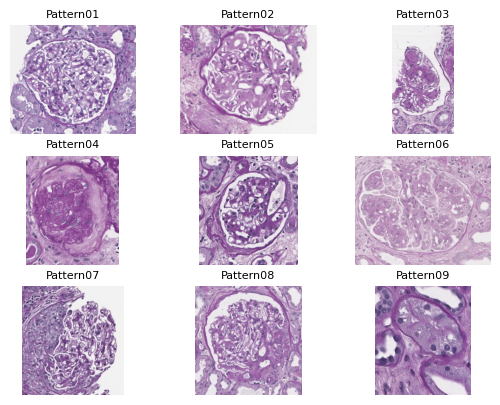

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

# List of directory paths where .tif images are located
# directories = ['/path/to/dir1', '/path/to/dir2', '/path/to/dir3', '/path/to/dir4', '/path/to/dir5', '/path/to/dir6', '/path/to/dir7', '/path/to/dir8', '/path/to/dir9']
directories = ['D:\Research 2\All 9 pattern dataset test-set\Pattern01', 'D:\Research 2\All 9 pattern dataset test-set\Pattern02', 'D:\Research 2\All 9 pattern dataset test-set\Pattern03', 'D:\Research 2\All 9 pattern dataset test-set\Pattern04', 'D:\Research 2\All 9 pattern dataset test-set\Pattern05', 'D:\Research 2\All 9 pattern dataset test-set\Pattern06', 'D:\Research 2\All 9 pattern dataset test-set\Pattern07', 'D:\Research 2\All 9 pattern dataset test-set\Pattern08', 'D:\Research 2\All 9 pattern dataset test-set\Pattern09']
# Create a subplot with a 3x3 grid
fig, axs = plt.subplots(3, 3)

# Loop through the directories and display one .tif image from each directory in the subplot
for i, directory in enumerate(directories):
    # Get a list of .tif files in the directory
    tif_files = [f for f in os.listdir(directory) if f.endswith('.tif')]
    # Choose the first .tif file in the directory
    tif_file = os.path.join(directory, tif_files[0])
    # Read the image using OpenCV
    image = cv2.imread(tif_file, cv2.IMREAD_UNCHANGED)
    # Convert the image from BGR to RGB for display with Matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Get the corresponding subplot axis
    ax = axs[i // 3, i % 3]
    # Display the image on the subplot
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(os.path.basename(directory), fontsize=8)

# Show the subplot
plt.show()
